# Using data from this FiveThirtyEight post, write code to calculate the correlation of the responses from the poll.
Respond to the story in your PR. Is this a good example of data journalism? Why or why not?

In [36]:
import pandas as pd
%matplotlib inline
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [213]:
df = pd.read_excel("Iran_data_3.xlsx")

In [214]:
df

,Subject,Sentiment,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No Degree,Under Age 35,35-54,55+,65+,Under $50k,$50k+,Lib,Cons,Party
0,Obama,Approve,0.44,0.78,0.10,0.37,0.41,0.47,0.35,0.85,...,0.43,0.56,0.35,0.45,0.43,0.48,0.42,0.69,0.24,0.15
1,Obama,Disapprove,0.50,0.17,0.86,0.53,0.53,0.47,0.60,0.07,...,0.52,0.36,0.60,0.50,0.52,0.46,0.52,0.24,0.72,0.82
2,Obama,(Don't know),0.06,0.05,0.04,0.10,0.05,0.06,0.05,0.08,...,0.06,0.08,0.04,0.05,0.05,0.05,0.05,0.06,0.04,0.02
3,Negotiations,Very confident,0.17,0.29,0.04,0.15,0.17,0.17,0.11,0.37,...,0.14,0.18,0.13,0.19,0.18,0.18,0.16,0.24,0.10,0.06
4,Negotiations,Somewhat confident,0.31,0.49,0.13,0.29,0.28,0.35,0.29,0.46,...,0.29,0.39,0.29,0.29,0.26,0.34,0.31,0.48,0.19,0.11
5,Negotiations,Not very confident,0.19,0.11,0.26,0.22,0.18,0.19,0.21,0.06,...,0.22,0.23,0.20,0.15,0.14,0.16,0.20,0.16,0.22,0.16
6,Negotiations,Not at all confident,0.31,0.08,0.57,0.32,0.35,0.27,0.37,0.05,...,0.32,0.17,0.38,0.34,0.40,0.29,0.32,0.11,0.47,0.67
7,Negotiations,(Don't know),0.02,0.04,0.01,0.02,0.02,0.02,0.02,0.05,...,0.03,0.03,0.00,0.03,0.02,0.03,0.01,0.01,0.02,0.00
8,Deal,Favor,0.47,0.60,0.34,0.44,0.46,0.47,0.45,0.54,...,0.45,0.51,0.46,0.45,0.41,0.47,0.48,0.61,0.35,0.35
9,Deal,Oppose,0.43,0.26,0.60,0.49,0.48,0.39,0.46,0.31,...,0.45,0.37,0.47,0.44,0.49,0.45,0.41,0.28,0.56,0.61


# Create a new df just with data for Approve of Obama

In [215]:
df_obama_approve = df[df['Sentiment'] == 'Approve']

In [216]:
df_obama_approve

,Subject,Sentiment,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No Degree,Under Age 35,35-54,55+,65+,Under $50k,$50k+,Lib,Cons,Party
0,Obama,Approve,0.44,0.78,0.1,0.37,0.41,0.47,0.35,0.85,...,0.43,0.56,0.35,0.45,0.43,0.48,0.42,0.69,0.24,0.15


In [217]:
del df_obama_approve['Sentiment']

# Create a new df just with data for In favor of the Iran deal

In [218]:
df_favor_iran_deal = df[df['Sentiment'] == 'Favor']

In [219]:
df_favor_iran_deal

,Subject,Sentiment,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No Degree,Under Age 35,35-54,55+,65+,Under $50k,$50k+,Lib,Cons,Party
8,Deal,Favor,0.47,0.6,0.34,0.44,0.46,0.47,0.45,0.54,...,0.45,0.51,0.46,0.45,0.41,0.47,0.48,0.61,0.35,0.35


In [220]:
del df_favor_iran_deal['Sentiment']

In [221]:
df_favor_iran_deal

,Subject,Total,Dem,Rep,Ind,Men,Women,White,Black,College Degree,No Degree,Under Age 35,35-54,55+,65+,Under $50k,$50k+,Lib,Cons,Party
8,Deal,0.47,0.6,0.34,0.44,0.46,0.47,0.45,0.54,0.5,0.45,0.51,0.46,0.45,0.41,0.47,0.48,0.61,0.35,0.35


# Combine the the two sub df

In [222]:
obama_approve_favor_deal = df_obama_approve.append(df_favor_iran_deal)

In [223]:
obama_approve_favor_deal

,Subject,Total,Dem,Rep,Ind,Men,Women,White,Black,College Degree,No Degree,Under Age 35,35-54,55+,65+,Under $50k,$50k+,Lib,Cons,Party
0,Obama,0.44,0.78,0.10,0.37,0.41,0.47,0.35,0.85,0.47,0.43,0.56,0.35,0.45,0.43,0.48,0.42,0.69,0.24,0.15
8,Deal,0.47,0.60,0.34,0.44,0.46,0.47,0.45,0.54,0.50,0.45,0.51,0.46,0.45,0.41,0.47,0.48,0.61,0.35,0.35


In [224]:
del obama_approve_favor_deal['Subject']

In [225]:
del obama_approve_favor_deal['Total']

# Transpose so we can have out column names as rows

In [226]:
obama_approve_favor_deal_transpose = obama_approve_favor_deal.transpose()

In [227]:
obama_approve_favor_deal_transpose.columns = ["Approve_Obama","Favor_Deal"]
obama_approve_favor_deal_transpose

,Approve_Obama,Favor_Deal
Dem,0.78,0.60
Rep,0.10,0.34
Ind,0.37,0.44
Men,0.41,0.46
Women,0.47,0.47
White,0.35,0.45
Black,0.85,0.54
College Degree,0.47,0.50
No Degree,0.43,0.45
Under Age 35,0.56,0.51


In [228]:
plt.style.use('fivethirtyeight')

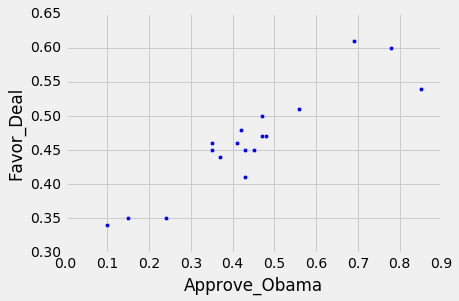

In [229]:
obama_approve_favor_deal_transpose.plot(kind='scatter', x= 'Approve_Obama', y='Favor_Deal')

# Calculate Correlation Coefficient

In [230]:
obama_approve_favor_deal_transpose.corr()

,Approve_Obama,Favor_Deal
Approve_Obama,1.000000,0.913868
Favor_Deal,0.913868,1.000000


In [231]:
lm = smf.ols(formula='Favor_Deal~Approve_Obama',data=obama_approve_favor_deal_transpose).fit()
lm.params

Intercept        0.305280
Approve_Obama    0.355619
dtype: float64

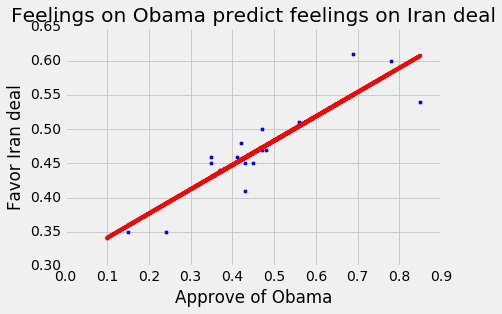

In [233]:
intercept, slope = lm.params
ax = obama_approve_favor_deal_transpose.plot(kind='scatter', x= 'Approve_Obama', y='Favor_Deal')
plt.plot(obama_approve_favor_deal_transpose["Approve_Obama"],slope*obama_approve_favor_deal_transpose["Approve_Obama"]+intercept,"-",color="red")
ax.set_title("Feelings on Obama predict feelings on Iran deal")
ax.set_ylabel('Favor Iran deal')
ax.set_xlabel("Approve of Obama")
